In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Set option to display all rows
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [2]:
# download files
!gdown 1toOrWru-f-5Jk0sLKUG5sta6uznNJh37 -O 'time_series_data_msba.csv'
!gdown 1VAmdhpDup4QrrZLAiUKt45Y8cOio6kcM -O 'qualitative_data_msba.csv'

file1_path = 'time_series_data_msba.csv'
file2_path = 'qualitative_data_msba.csv'

# read in data from CSV files
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

Downloading...
From: https://drive.google.com/uc?id=1toOrWru-f-5Jk0sLKUG5sta6uznNJh37
To: /content/time_series_data_msba.csv
100% 1.49M/1.49M [00:00<00:00, 117MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VAmdhpDup4QrrZLAiUKt45Y8cOio6kcM
To: /content/qualitative_data_msba.csv
100% 12.9k/12.9k [00:00<00:00, 44.5MB/s]


DataFrame 1 Overview:
   Unnamed: 0 capital_projects.soft_opening_date calendar.calendar_day_date  \
0           1                         2022-06-14                 2022-06-17   
1           2                         2022-06-14                 2022-06-22   
2           3                         2022-06-14                 2022-06-23   
3           4                         2022-06-14                 2022-06-26   
4           5                         2022-06-14                 2022-06-27   

   calendar.fiscal_week_id_for_year calendar.day_of_week  \
0                                25               Friday   
1                                25            Wednesday   
2                                25             Thursday   
3                                26               Sunday   
4                                26               Monday   

  calendar_information.holiday calendar_information.type_of_day  \
0                         NONE                          WEEKDAY   
1       

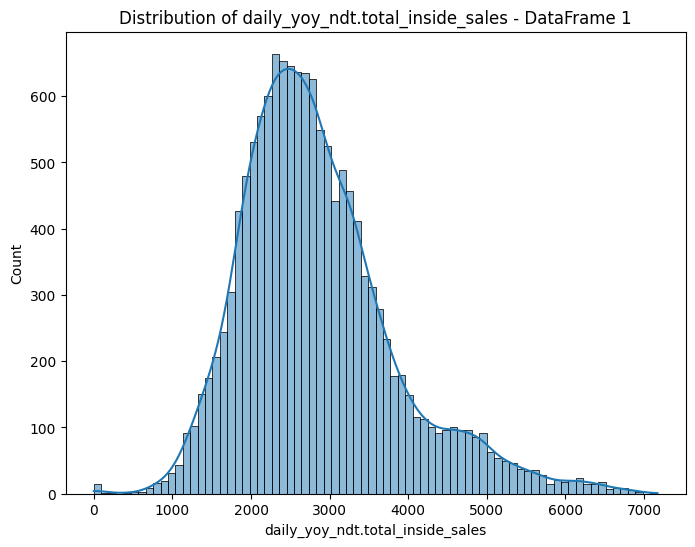

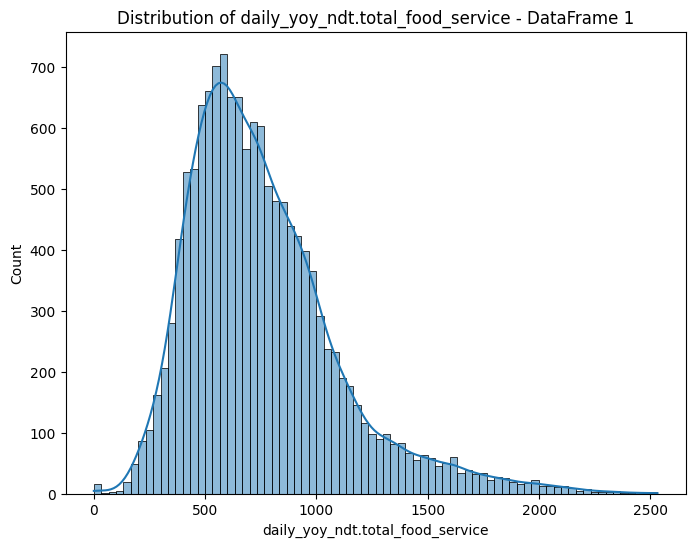

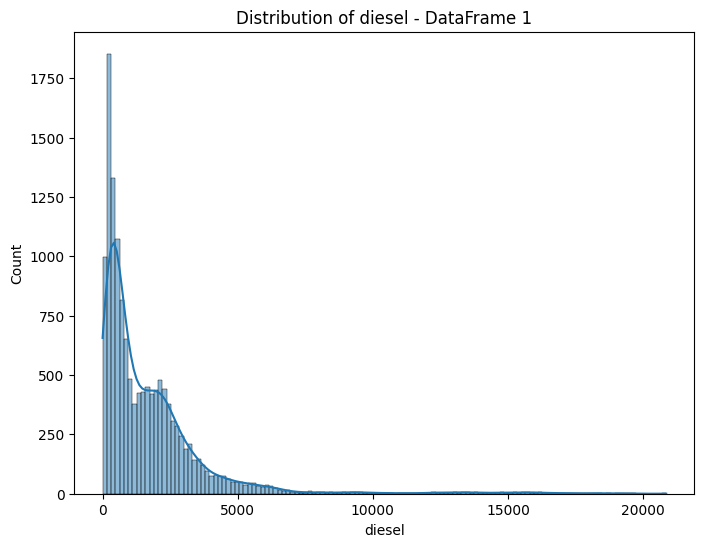

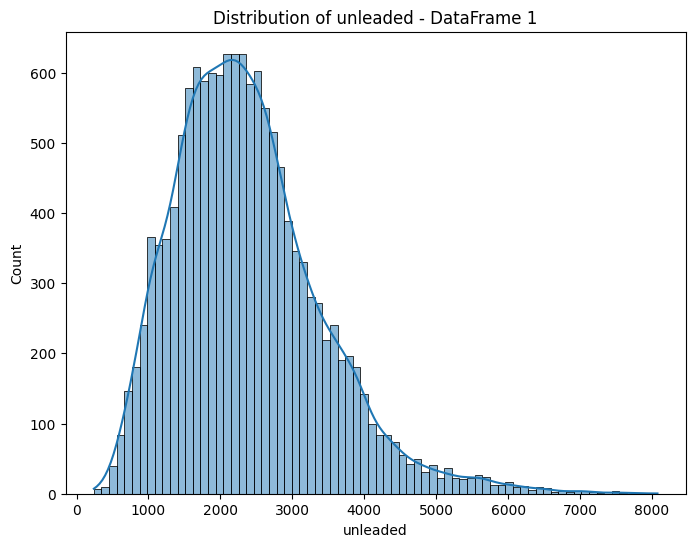

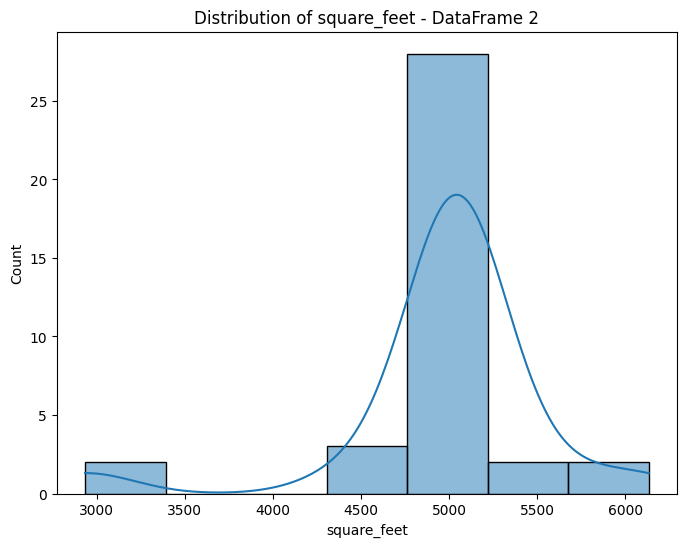

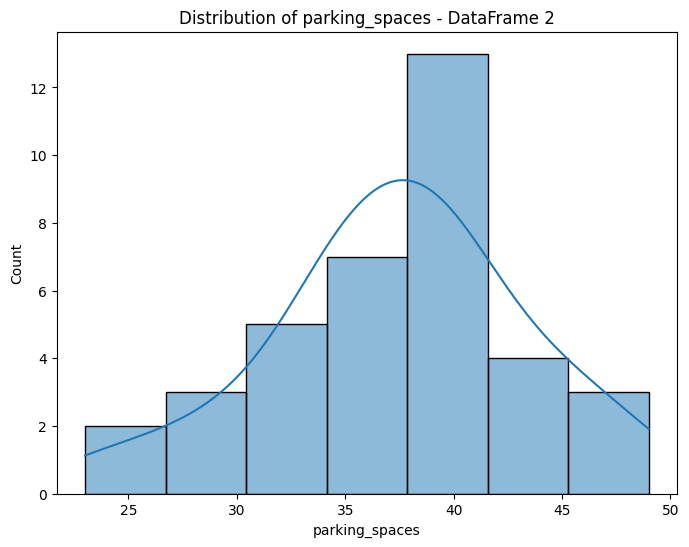

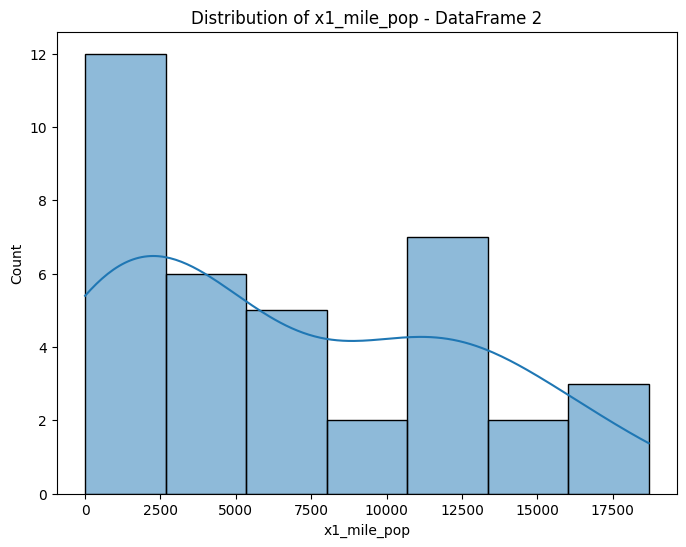

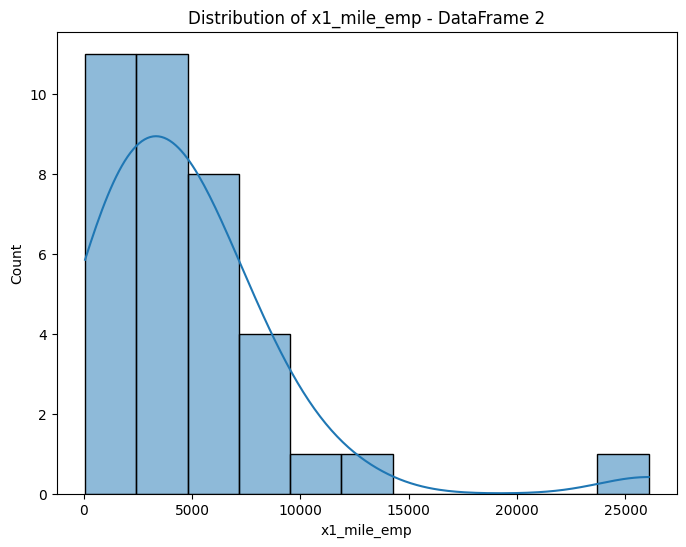

In [3]:
# 1. overview of dataframes
print("DataFrame 1 Overview:")
print(df1.head())
print(df1.info())
print(df1.describe())

print("\nDataFrame 2 Overview:")
print(df2.head())
print(df2.info())
print(df2.describe())

# 2. missing data check
print("\nMissing Data in DataFrame 1:")
print(df1.isnull().sum())

print("\nMissing Data in DataFrame 2:")
print(df2.isnull().sum())

# 3. unique values count
print("\nUnique Values in DataFrame 1:")
for col in df1.columns:
    print(f"{col}: {df1[col].nunique()} unique values")

print("\nUnique Values in DataFrame 2:")
for col in df2.columns:
    print(f"{col}: {df2[col].nunique()} unique values")

# 4. basic visualization
# basic visualization for df1
for col in ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df1[col], kde=True)
    plt.title(f"Distribution of {col} - DataFrame 1")
    plt.show()

# basic visualization for df2
for col in ['square_feet', 'parking_spaces', 'x1_mile_pop', 'x1_mile_emp']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[col], kde=True)
    plt.title(f"Distribution of {col} - DataFrame 2")
    plt.show()

In [4]:
# 1. Drop columns with only 1 unique value in df2
cols_to_drop = [col for col in df2.columns if df2[col].nunique() == 1]
df2.drop(cols_to_drop, axis=1, inplace=True)

# 2. Remove duplicate columns in df2
df2.drop(['hi_flow_lanes_fueling_positions_2', 'rv_lanes_fueling_positions_2'], axis=1, inplace=True)

# 3. Replace 'N/A' with 'Not Applicable' in df2
df2.replace('N/A', 'Not Applicable', inplace=True)

# 4. Extract year and day of the year from date columns in df1
df1['capital_projects.soft_open_year'] = pd.to_datetime(df1['capital_projects.soft_opening_date']).dt.year
df1['capital_projects.soft_open_day_of_year'] = pd.to_datetime(df1['capital_projects.soft_opening_date']).dt.dayofyear

df1['calendar.calendar_day_year'] = pd.to_datetime(df1['calendar.calendar_day_date']).dt.year
df1['calendar.calendar_day_day_of_year'] = pd.to_datetime(df1['calendar.calendar_day_date']).dt.dayofyear

# 5. Add 'days_since_open' column to df1
df1['days_since_open'] = (pd.to_datetime(df1['calendar.calendar_day_date']) - pd.to_datetime(df1['capital_projects.soft_opening_date'])).dt.days

# 6. Drop the original date columns if they are no longer needed
df1.drop(['capital_projects.soft_opening_date', 'calendar.calendar_day_date'], axis=1, inplace=True)

# 7. Remove 'Unnamed: 0_x' column
df1.drop('Unnamed: 0', axis=1, inplace=True)

# 8. Remove 'Unnamed: 0_x' column
df2.drop('Unnamed: 0', axis=1, inplace=True)


In [5]:
# Merge df1 and df2 on 'site_id_msba'
merged_df = pd.merge(df1, df2, on='site_id_msba', how='inner')

# Check the first few rows of the merged dataframe
print(merged_df.head())



   calendar.fiscal_week_id_for_year calendar.day_of_week  \
0                                25               Friday   
1                                25            Wednesday   
2                                25             Thursday   
3                                26               Sunday   
4                                26               Monday   

  calendar_information.holiday calendar_information.type_of_day  \
0                         NONE                          WEEKDAY   
1                         NONE                          WEEKDAY   
2                         NONE                          WEEKDAY   
3                         NONE                          WEEKEND   
4                         NONE                          WEEKDAY   

   daily_yoy_ndt.total_inside_sales  daily_yoy_ndt.total_food_service  \
0                         2168.2920                          861.6930   
1                         2051.5635                          808.0275   
2                

In [6]:
# Print the data types of each column in the merged DataFrame
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 13541
Data columns (total 57 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   calendar.fiscal_week_id_for_year         13542 non-null  int64  
 1   calendar.day_of_week                     13542 non-null  object 
 2   calendar_information.holiday             13542 non-null  object 
 3   calendar_information.type_of_day         13542 non-null  object 
 4   daily_yoy_ndt.total_inside_sales         13542 non-null  float64
 5   daily_yoy_ndt.total_food_service         13542 non-null  float64
 6   diesel                                   13542 non-null  float64
 7   unleaded                                 13542 non-null  float64
 8   site_id_msba                             13542 non-null  int64  
 9   capital_projects.soft_open_year          13542 non-null  int64  
 10  capital_projects.soft_open_day_of_year   13542

In [7]:
# Set option to display all columns
pd.set_option('display.max_columns', 25)

# Selecting only the object-type columns for one-hot encoding
object_cols = merged_df.select_dtypes(include='object').columns

# Applying one-hot encoding
encoded_df = pd.get_dummies(merged_df, columns=object_cols)

# Check the first few rows of the new DataFrame
print(encoded_df.head())

   calendar.fiscal_week_id_for_year  daily_yoy_ndt.total_inside_sales  \
0                                25                         2168.2920   
1                                25                         2051.5635   
2                                25                         2257.5000   
3                                26                         1520.5925   
4                                26                         1897.6930   

   daily_yoy_ndt.total_food_service    diesel   unleaded  site_id_msba  \
0                          861.6930  722.7745  1425.1020         24535   
1                          808.0275  730.4850  1436.2740         24535   
2                          966.4410  895.7970  1594.3725         24535   
3                          542.3250  584.2900  1124.9280         24535   
4                          771.4525  852.2605  1640.2540         24535   

   capital_projects.soft_open_year  capital_projects.soft_open_day_of_year  \
0                             2022    

In [8]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Print the data types of each column in the merged DataFrame
print(encoded_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 13541
Columns: 111 entries, calendar.fiscal_week_id_for_year to hi_flow_rv_lanes_stack_type_None
dtypes: float64(4), int64(30), uint8(77)
memory usage: 4.6 MB
None


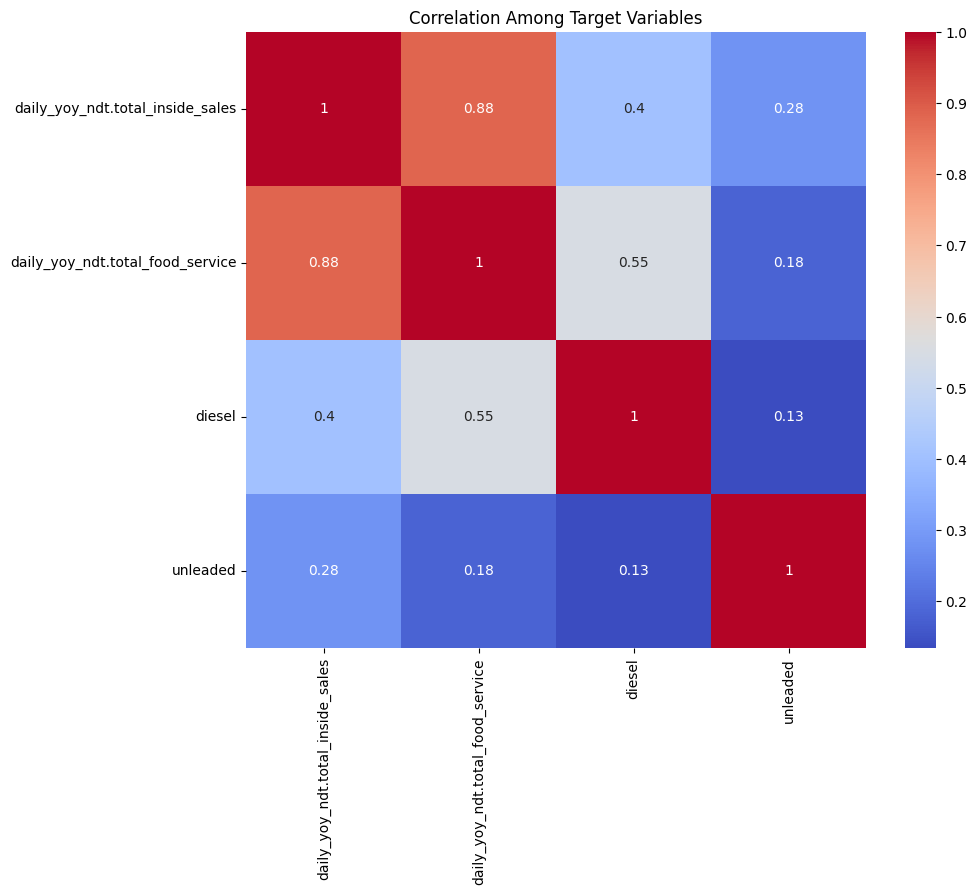

In [9]:
# Selecting the target variables
targets = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']

# Calculating the correlation matrix for the target variables
corr_targets = encoded_df[targets].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_targets, annot=True, cmap='coolwarm')
plt.title("Correlation Among Target Variables")
plt.show()

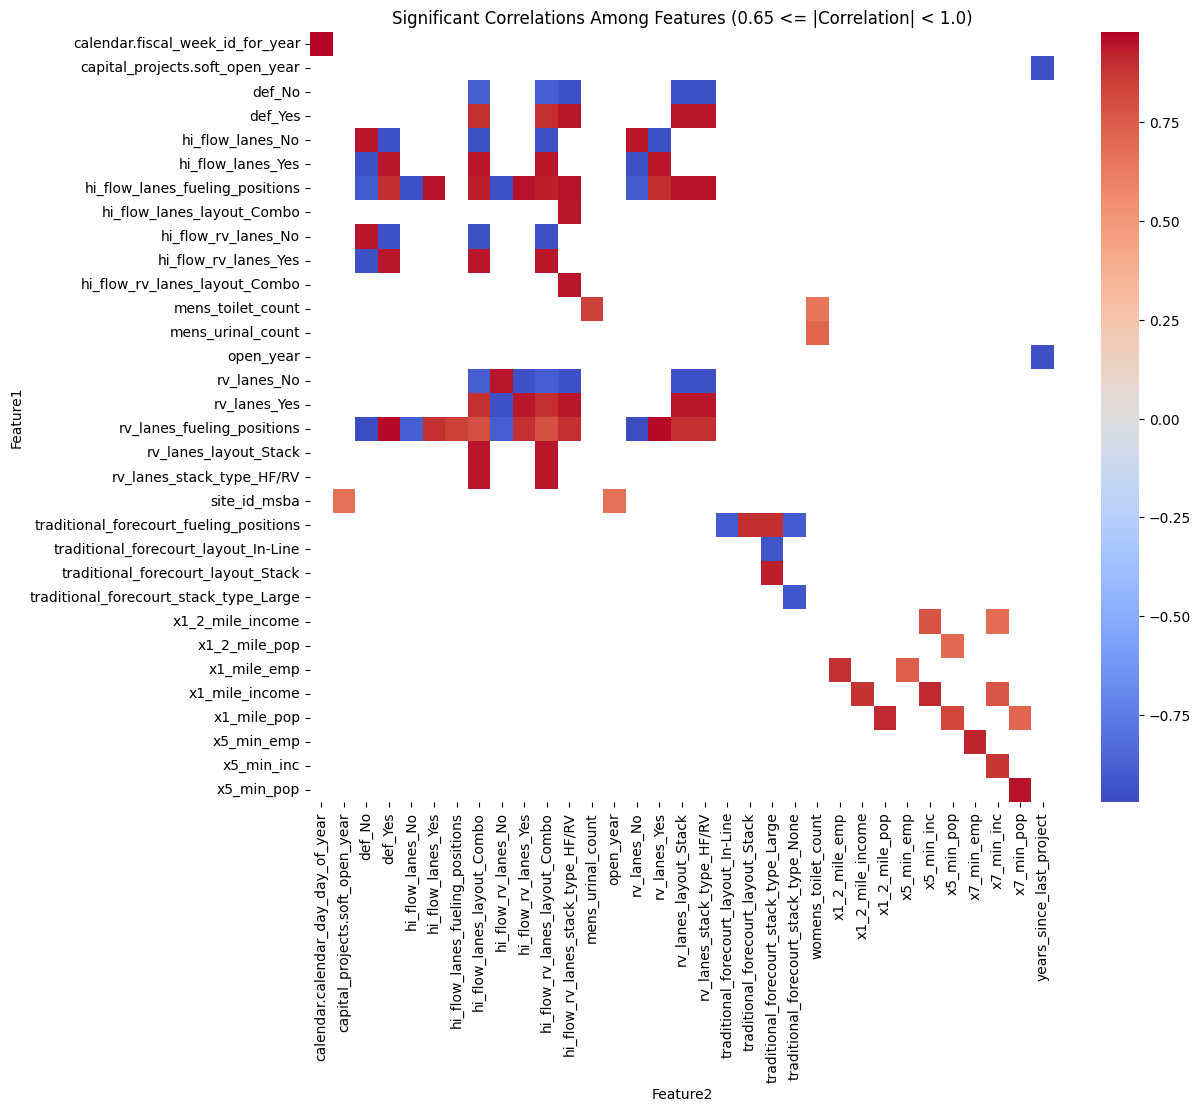

In [10]:
# Set correlation threshold
correlation_lower_threshold = 0.65
correlation_upper_threshold = 0.99

# Calculating the correlation matrix for all features (excluding the target variables)
features = encoded_df.drop(targets, axis=1)
corr_features = features.corr()

# Filtering and sorting correlation values
significant_corr_features = corr_features.where(np.triu(np.ones(corr_features.shape), k=1).astype(bool))
significant_corr_features = significant_corr_features.stack().reset_index()
significant_corr_features.columns = ['Feature1', 'Feature2', 'Correlation']
significant_corr_features = significant_corr_features.dropna().sort_values(by='Correlation', ascending=False)

# Filter out correlations outside the specified range
significant_corr_features = significant_corr_features[
    (significant_corr_features['Correlation'].abs() >= correlation_lower_threshold) &
    (significant_corr_features['Correlation'].abs() < correlation_upper_threshold)]

# Visualizing the significant correlations using a heatmap
# First, reshape the data to a pivot table suitable for a heatmap
pivot_table = significant_corr_features.pivot('Feature1', 'Feature2', 'Correlation')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title("Significant Correlations Among Features (0.65 <= |Correlation| < 1.0)")
plt.show()

In [11]:
# Threshold for filtering significant correlations
correlation_threshold = 0.25

# Combining features and targets for correlation analysis
combined = pd.concat([features, encoded_df[targets]], axis=1)

# Calculating the correlation matrix between features and targets
corr_combined = combined.corr()
corr_features_targets = corr_combined.loc[features.columns, targets]

# Filtering and sorting correlation values
significant_corr = corr_features_targets[corr_features_targets.abs() > correlation_threshold].stack().reset_index()
significant_corr.columns = ['Feature', 'Target', 'Correlation']
significant_corr = significant_corr.dropna().sort_values(by='Correlation', ascending=False)

# Displaying the significant correlations
print(significant_corr)


                                     Feature  \
20           hi_flow_lanes_fueling_positions   
24                         mens_urinal_count   
22                         mens_toilet_count   
28                         womens_sink_count   
19           hi_flow_lanes_fueling_positions   
52                         hi_flow_lanes_Yes   
91         hi_flow_rv_lanes_stack_type_HF/RV   
82                 rv_lanes_stack_type_HF/RV   
64                      hi_flow_rv_lanes_Yes   
79                     rv_lanes_layout_Stack   
53                         hi_flow_lanes_Yes   
65                      hi_flow_rv_lanes_Yes   
92         hi_flow_rv_lanes_stack_type_HF/RV   
80                     rv_lanes_layout_Stack   
83                 rv_lanes_stack_type_HF/RV   
58                              rv_lanes_Yes   
70                                   def_Yes   
86                hi_flow_lanes_layout_Combo   
89             hi_flow_rv_lanes_layout_Combo   
73                            cat_scales

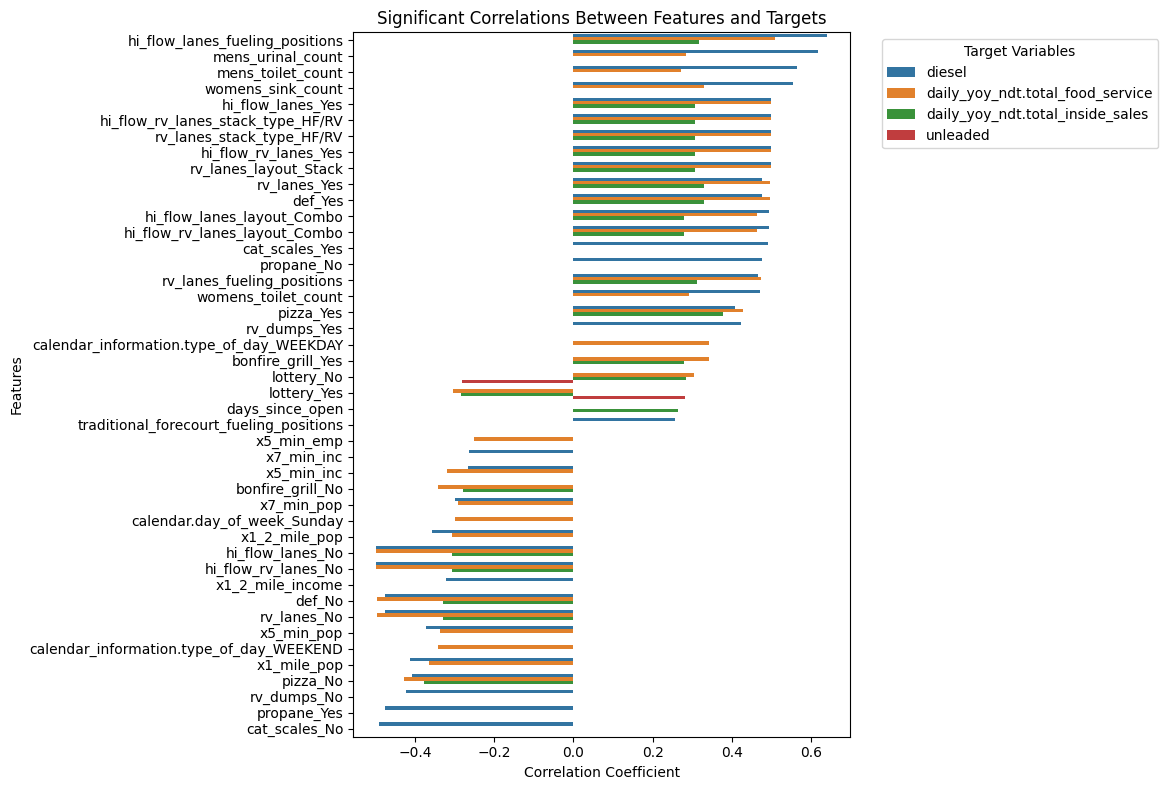

In [12]:
# Plotting the significant correlations
plt.figure(figsize=(12, 8))
sns.barplot(data=significant_corr, x='Correlation', y='Feature', hue='Target')
plt.title('Significant Correlations Between Features and Targets')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.legend(title='Target Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and the target set (y)
X = encoded_df.drop(['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded'], axis=1)
y = encoded_df[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Checking the dimensions of the train and test sets
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (10833, 107)
X_test: (2709, 107)
y_train: (10833, 4)
y_test: (2709, 4)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initializing the Random Forest Regressor for multi-output
multioutput_rf_regressor = RandomForestRegressor(n_estimators=100, random_state=101)

# Training the model on the training data
multioutput_rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = multioutput_rf_regressor.predict(X_test)

# Evaluating the model
# Here we use RMSE (Root Mean Squared Error) for each target variable
rmse_scores = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))

# Print RMSE scores for each target
for i, col in enumerate(y.columns):
    print(f"RMSE for {col}: {rmse_scores[i]}")

RMSE for daily_yoy_ndt.total_inside_sales: 300.2696408296028
RMSE for daily_yoy_ndt.total_food_service: 96.0669190295404
RMSE for diesel: 432.3365668884068
RMSE for unleaded: 325.2421242844131


In [15]:
# RMSE approach to endeavor to make apples to apples comparison to benchmarks

def forecast_and_evaluate(X_test, y_test, model, days_threshold, targets):
    rmse_scores = {target: [] for target in targets}
    total_sales_forecasts = {target: {'observed': 0, 'forecasted': 0, 'total': 0} for target in targets}

    # Iterate through each unique store
    for store_id in X_test['site_id_msba'].unique():
        store_data = X_test[X_test['site_id_msba'] == store_id]
        y_actual = y_test.loc[store_data.index]

        # Predict for the entire period
        y_predicted = model.predict(store_data)

        for i, target in enumerate(targets):
            # Modify y_actual for the observation period to match y_predicted
            y_actual_modified = y_actual[target].copy()
            observed_index = store_data['days_since_open'] <= days_threshold
            y_actual_modified[observed_index] = y_predicted[:, i][observed_index]

            # Calculate RMSE with modified actual values
            rmse = np.sqrt(mean_squared_error(y_actual_modified, y_predicted[:, i]))
            rmse_scores[target].append(rmse)

            # Aggregate observed and forecasted sales
            total_sales_forecasts[target]['observed'] += y_actual[target][observed_index].sum()
            total_sales_forecasts[target]['forecasted'] += y_predicted[:, i][~observed_index].sum()
            total_sales_forecasts[target]['total'] += y_actual_modified.sum()

    # Calculate the average and total RMSE scores across all stores for each target
    average_rmse_scores = {target: np.mean(rmses) for target, rmses in rmse_scores.items()}
    total_rmse_scores = {target: sum(rmses) for target, rmses in rmse_scores.items()}
    return average_rmse_scores, total_rmse_scores, total_sales_forecasts


In [16]:
def print_sales_forecast_details(total_sales_forecasts, rmse_scores_avg, rmse_scores_total, period_name):
    print(f"--- {period_name} ---")
    for target in total_sales_forecasts:
        print(f"{target}:")
        print(f"  Observed Revenue: {total_sales_forecasts[target]['observed']}")
        print(f"  Projected Revenue: {total_sales_forecasts[target]['forecasted']}")
        print(f"  Total Revenue: {total_sales_forecasts[target]['total']}")
        print(f"  Average RMSE: {rmse_scores_avg[target]}")
        print(f"  Total RMSE: {rmse_scores_total[target]}")
    print("\n")

In [17]:
# Running the evaluations for Random Forest with different observation periods
rf_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 13, targets)
rf_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 20, targets)
rf_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 182, targets)

# Extracting RMSE and revenue forecasts from the results
rf_two_week_avg_rmse, rf_two_week_total_rmse, rf_two_week_sales_forecasts = rf_two_week_results
rf_three_week_avg_rmse, rf_three_week_total_rmse, rf_three_week_sales_forecasts = rf_three_week_results
rf_six_month_avg_rmse, rf_six_month_total_rmse, rf_six_month_sales_forecasts = rf_six_month_results

# Printing results
print_sales_forecast_details(rf_two_week_sales_forecasts, rf_two_week_avg_rmse, rf_two_week_total_rmse, "Two Week Observation Period")
print_sales_forecast_details(rf_three_week_sales_forecasts, rf_three_week_avg_rmse, rf_three_week_total_rmse, "Three Week Observation Period")
print_sales_forecast_details(rf_six_month_sales_forecasts, rf_six_month_avg_rmse, rf_six_month_total_rmse, "Six Month Observation Period")


--- Two Week Observation Period ---
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 210861.72100000005
  Projected Revenue: 7486185.42273
  Total Revenue: 7716241.902809998
  Average RMSE: 275.0399987584891
  Total RMSE: 10176.479954064098
daily_yoy_ndt.total_food_service:
  Observed Revenue: 64611.39300000001
  Projected Revenue: 2026457.306055
  Total Revenue: 2088344.376615
  Average RMSE: 86.60042625664018
  Total RMSE: 3204.2157714956866
diesel:
  Observed Revenue: 99382.81500000002
  Projected Revenue: 4736113.4345
  Total Revenue: 4824683.687040001
  Average RMSE: 303.00314352485367
  Total RMSE: 11211.116310419586
unleaded:
  Observed Revenue: 163525.12399999998
  Projected Revenue: 6291038.468574998
  Total Revenue: 6475705.0428
  Average RMSE: 279.38361034298646
  Total RMSE: 10337.193582690497


--- Three Week Observation Period ---
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 329704.613
  Projected Revenue: 7369145.191205
  Total Revenue: 7714439.242335001
  

Plotting chart for daily_yoy_ndt.total_inside_sales


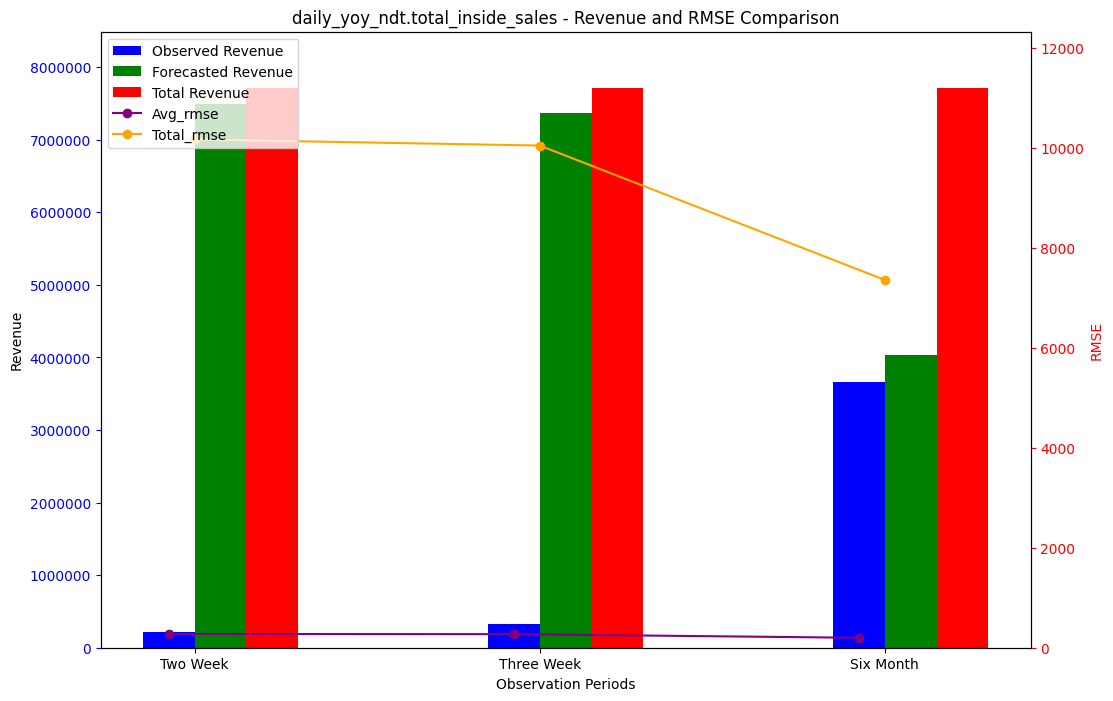

Plotting chart for daily_yoy_ndt.total_food_service


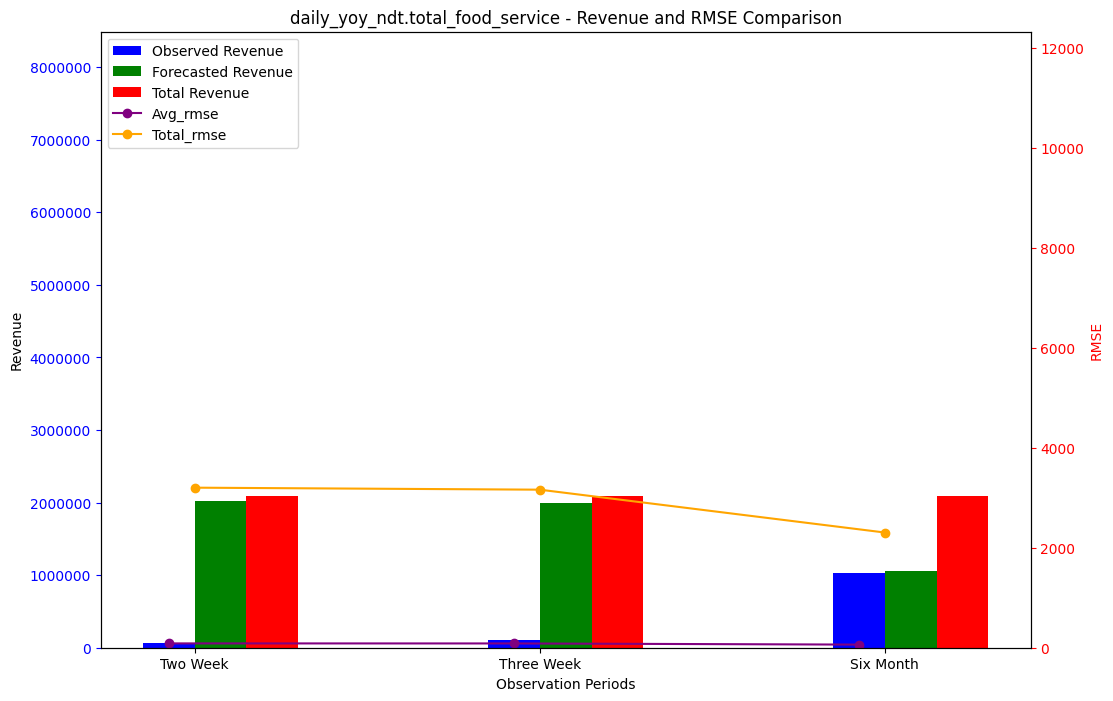

Plotting chart for diesel


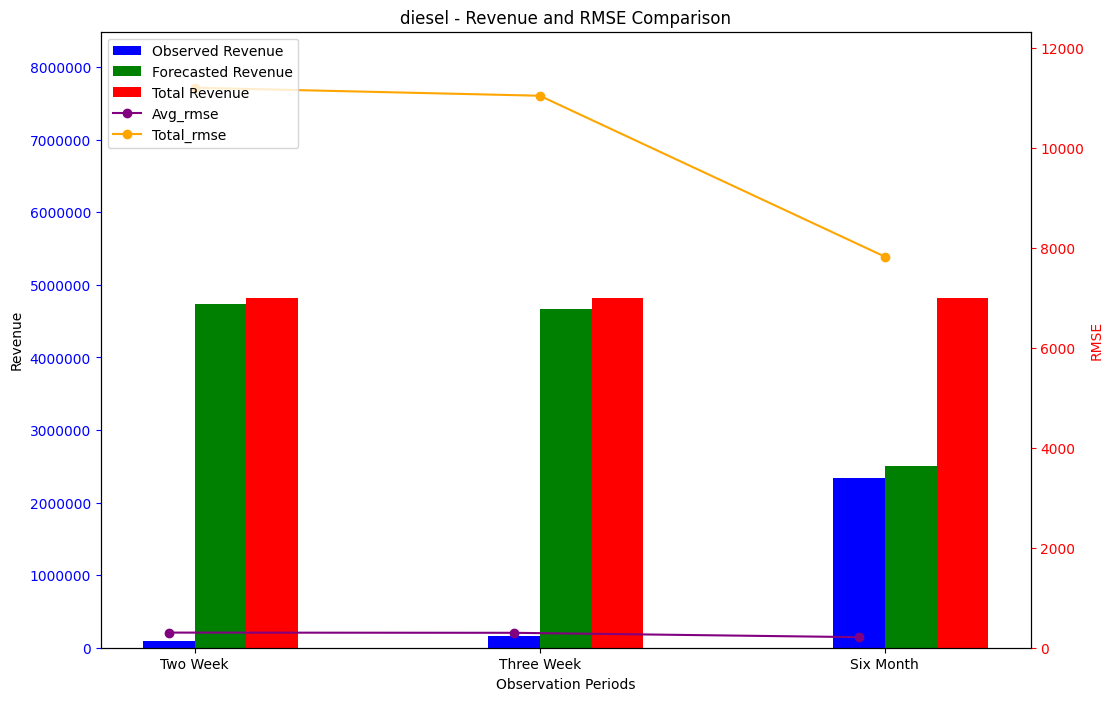

Plotting chart for unleaded


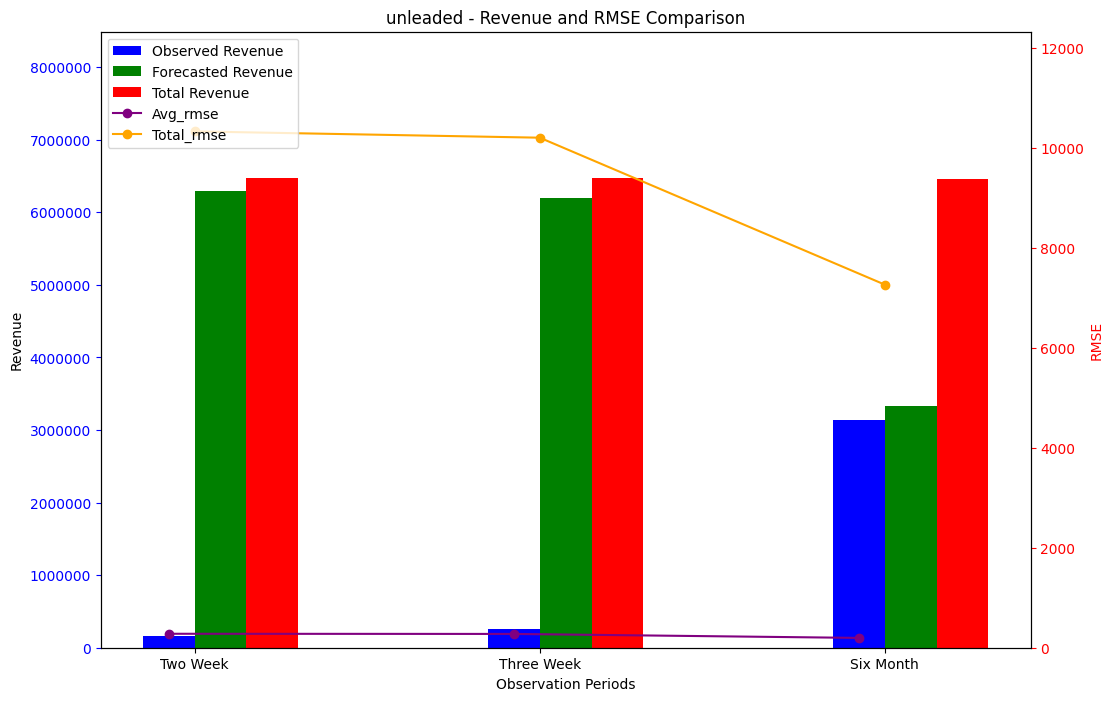

In [18]:
def find_max_values(results):
    max_revenue = 0
    max_rmse = 0
    for result in results:
        max_revenue = max(max_revenue, max(result[-1][target]['total'] for target in targets))
        max_rmse = max(max_rmse, max(result[1][target] for target in targets))
    return max_revenue, max_rmse

# Running the evaluations for Random Forest with different observation periods
rf_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 13, targets)
rf_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 20, targets)
rf_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 182, targets)

# Finding max values for scales
max_revenue, max_rmse = find_max_values([rf_two_week_results, rf_three_week_results, rf_six_month_results])

# Adding a buffer to the max values for scale consistency
revenue_limit = max_revenue * 1.1  # 10% extra buffer
rmse_limit = max_rmse * 1.1        # 10% extra buffer

# Updated plotting function
def plot_revenue_rmse_for_target(target, two_week_results, three_week_results, six_month_results):
    periods = ['Two Week', 'Three Week', 'Six Month']
    metrics = ['observed', 'forecasted', 'total']
    rmse_metrics = ['avg_rmse', 'total_rmse']
    colors = ['blue', 'green', 'red', 'purple', 'orange']

    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Revenue Bar Chart
    bar_width = 0.15
    index = np.arange(len(periods))

    for i, metric in enumerate(metrics):
        data_to_plot = [two_week_results[-1][target][metric], three_week_results[-1][target][metric], six_month_results[-1][target][metric]]
        ax1.bar(index + i * bar_width, data_to_plot, bar_width, color=colors[i], label=f'{metric.capitalize()} Revenue')

    ax1.set_xlabel('Observation Periods')
    ax1.set_ylabel('Revenue')
    ax1.tick_params('y', colors='blue')
    ax1.set_ylim(0, revenue_limit)  # Consistent y-axis limit for revenue
    ax1.ticklabel_format(style='plain', axis='y')
    ax1.set_xticks(index + bar_width / 2)
    ax1.set_xticklabels(periods)
    ax1.set_title(f'{target} - Revenue and RMSE Comparison')

    # Secondary axis for RMSE
    ax2 = ax1.twinx()
    for i, rmse_metric in enumerate(rmse_metrics):
        rmse_data_to_plot = [two_week_results[0 if rmse_metric == 'avg_rmse' else 1][target], three_week_results[0 if rmse_metric == 'avg_rmse' else 1][target], six_month_results[0 if rmse_metric == 'avg_rmse' else 1][target]]
        ax2.plot(index + i * bar_width / 2, rmse_data_to_plot, color=colors[i + 3], marker='o', label=f'{rmse_metric.capitalize()}')

    ax2.set_ylabel('RMSE', color='red')
    ax2.tick_params('y', colors='red')
    ax2.set_ylim(0, rmse_limit)  # Consistent y-axis limit for RMSE
    ax2.ticklabel_format(style='plain', axis='y')

    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

# Plotting charts for each target variable
for target in targets:
    print(f"Plotting chart for {target}")
    plot_revenue_rmse_for_target(target, rf_two_week_results, rf_three_week_results, rf_six_month_results)


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter distribution
param_dist_rf = {
    'n_estimators': sp_randint(100, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 5),
    'max_features': ['auto', 'sqrt']
}

# Create RandomizedSearchCV
random_search_rf = RandomizedSearchCV(multioutput_rf_regressor, param_distributions=param_dist_rf,
                                      n_iter=7, cv=4, scoring='neg_mean_squared_error', random_state=101)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Best parameters
best_parameters_rf = random_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_parameters_rf}")

# Retrain model with the best parameters
multioutput_rf_regressor.set_params(**best_parameters_rf)
multioutput_rf_regressor.fit(X_train, y_train)

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 210}


RandomForestRegressor(max_features='auto', min_samples_leaf=2, n_estimators=210,
                      random_state=101)

In [20]:
# Run evaluations after tuning
tuned_rf_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 13, targets)
tuned_rf_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 20, targets)
tuned_rf_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 182, targets)

def print_comparison_with_difference(initial_results, tuned_results, period_name):
    initial_avg_rmse, initial_total_rmse, initial_sales_forecasts = initial_results
    tuned_avg_rmse, tuned_total_rmse, tuned_sales_forecasts = tuned_results

    print(f"--- {period_name} ---")
    print("Before Tuning / After Tuning / Difference")
    for target in targets:
        print(f"{target}:")
        observed_diff = tuned_sales_forecasts[target]['observed'] - initial_sales_forecasts[target]['observed']
        projected_diff = tuned_sales_forecasts[target]['forecasted'] - initial_sales_forecasts[target]['forecasted']
        total_diff = tuned_sales_forecasts[target]['total'] - initial_sales_forecasts[target]['total']
        avg_rmse_diff = tuned_avg_rmse[target] - initial_avg_rmse[target]
        total_rmse_diff = tuned_total_rmse[target] - initial_total_rmse[target]

        # Formatting the differences
        observed_diff_str = f"+{observed_diff}" if observed_diff > 0 else f"{observed_diff}"
        projected_diff_str = f"+{projected_diff}" if projected_diff > 0 else f"{projected_diff}"
        total_diff_str = f"+{total_diff}" if total_diff > 0 else f"{total_diff}"
        avg_rmse_diff_str = f"+{avg_rmse_diff}" if avg_rmse_diff > 0 else f"{avg_rmse_diff}"
        total_rmse_diff_str = f"+{total_rmse_diff}" if total_rmse_diff > 0 else f"{total_rmse_diff}"

        print(f"  Observed Revenue: {initial_sales_forecasts[target]['observed']} / {tuned_sales_forecasts[target]['observed']} / {observed_diff_str}")
        print(f"  Projected Revenue: {initial_sales_forecasts[target]['forecasted']} / {tuned_sales_forecasts[target]['forecasted']} / {projected_diff_str}")
        print(f"  Total Revenue: {initial_sales_forecasts[target]['total']} / {tuned_sales_forecasts[target]['total']} / {total_diff_str}")
        print(f"  Average RMSE: {initial_avg_rmse[target]} / {tuned_avg_rmse[target]} / {avg_rmse_diff_str}")
        print(f"  Total RMSE: {initial_total_rmse[target]} / {tuned_total_rmse[target]} / {total_rmse_diff_str}")
    print("\n")

# Comparing results with difference for each observation period
print_comparison_with_difference(rf_two_week_results, tuned_rf_two_week_results, "Two Week Observation Period")
print_comparison_with_difference(rf_three_week_results, tuned_rf_three_week_results, "Three Week Observation Period")
print_comparison_with_difference(rf_six_month_results, tuned_rf_six_month_results, "Six Month Observation Period")

--- Two Week Observation Period ---
Before Tuning / After Tuning / Difference
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 210861.72100000005 / 210861.72100000005 / 0.0
  Projected Revenue: 7486185.42273 / 7485434.128155203 / -751.2945747971535
  Total Revenue: 7716241.902809998 / 7719604.545934757 / +3362.6431247591972
  Average RMSE: 275.0399987584891 / 272.9584959238545 / -2.081502834634591
  Total RMSE: 10176.479954064098 / 10099.46434918262 / -77.0156048814788
daily_yoy_ndt.total_food_service:
  Observed Revenue: 64611.39300000001 / 64611.39300000001 / 0.0
  Projected Revenue: 2026457.306055 / 2022121.4440668328 / -4335.8619881672785
  Total Revenue: 2088344.376615 / 2088761.9421392002 / +417.56552420021035
  Average RMSE: 86.60042625664018 / 85.98805797278581 / -0.6123682838543658
  Total RMSE: 3204.2157714956866 / 3181.558144993075 / -22.657626502611492
diesel:
  Observed Revenue: 99382.81500000002 / 99382.81500000002 / 0.0
  Projected Revenue: 4736113.4345 / 4710758.10

In [21]:
def plot_feature_importance_with_correlation(model, feature_names, model_name, target_variables, data, top_n=10):
    """
    Plots the top N most important features of the given model with color coding based on correlation.

    :param model: The trained model.
    :param feature_names: List of feature names.
    :param model_name: Name of the model (for title).
    :param target_variables: List of target variable names.
    :param data: DataFrame containing the features and targets.
    :param top_n: Number of top features to display.
    """
    # Extract feature importances and pair with feature names
    feature_importances = model.feature_importances_
    features = list(zip(feature_names, feature_importances))

    # Sort features by their importance
    sorted_features = sorted(features, key=lambda x: x[1], reverse=True)

    # Select top N features
    top_features = sorted_features[:top_n]
    top_feature_names = [feature[0] for feature in top_features]

    # Calculating correlation with target variables
    correlations = data[top_feature_names + target_variables].corr()

    # Colors based on correlation
    colors = []
    for feature in top_feature_names:
        # Average correlation with all target variables
        avg_corr = correlations.loc[feature, target_variables].mean()
        colors.append('blue' if avg_corr >= 0 else 'red')

    # Plotting
    y_pos = np.arange(len(top_feature_names))
    top_importances = [feature[1] for feature in top_features]

    plt.figure(figsize=(10, 6))
    plt.barh(y_pos, top_importances, align='center', alpha=0.7, color=colors)
    plt.yticks(y_pos, top_feature_names)
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Features in {model_name}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
    plt.show()

# create feature names
feature_names = X_train.columns.tolist()

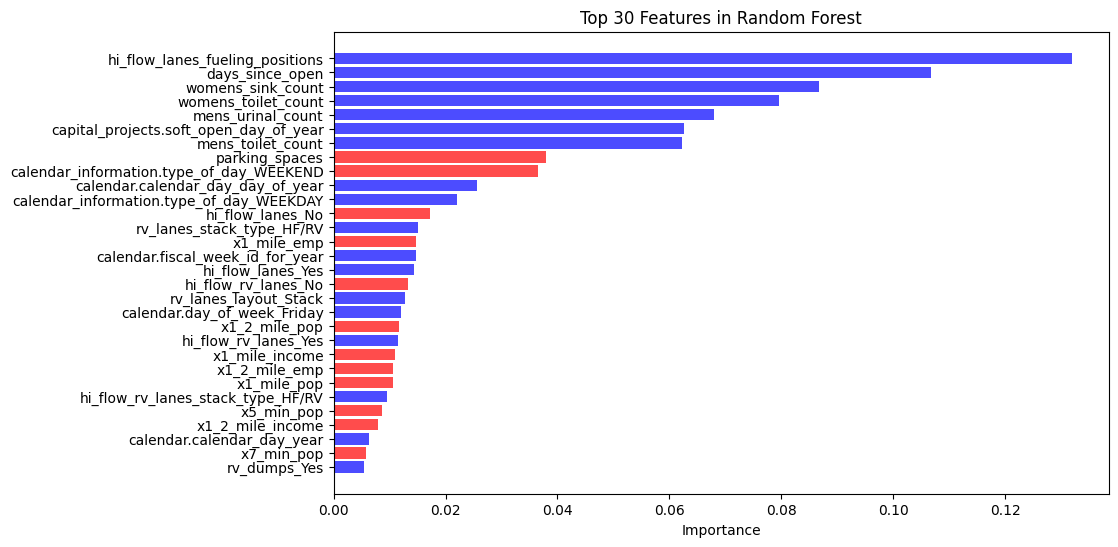

In [22]:
# Random Forest model feature importance
plot_feature_importance_with_correlation(
    multioutput_rf_regressor,
    feature_names,
    'Random Forest',
    targets,
    encoded_df,  # Assuming 'encoded_df' contains both features and targets
    top_n=30
)


In [23]:
!pip install xgboost

In [24]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=101)

# Wrap it with MultiOutputRegressor to handle multiple targets
multioutput_xgb_regressor = MultiOutputRegressor(xgb_regressor)

# Train the model on the training data
multioutput_xgb_regressor.fit(X_train, y_train)

# The model is now trained and can be used for predictions


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=101, ...))

In [25]:
# Making predictions on the test set
y_pred = multioutput_xgb_regressor.predict(X_test)

# Calculating RMSE for each target variable
rmse_scores = {}
for i, col in enumerate(y_test.columns):
    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred[:, i]))
    rmse_scores[col] = rmse

# Displaying the RMSE scores
for target, rmse in rmse_scores.items():
    print(f"RMSE for {target}: {rmse}")


RMSE for daily_yoy_ndt.total_inside_sales: 258.2653274318222
RMSE for daily_yoy_ndt.total_food_service: 79.39983320754193
RMSE for diesel: 380.1267553683078
RMSE for unleaded: 292.13112589390647


In [26]:
# Running the evaluations for XGBoost with different observation periods
xgb_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_xgb_regressor, 13, targets)
xgb_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_xgb_regressor, 20, targets)
xgb_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_xgb_regressor, 182, targets)

# Printing results
print_sales_forecast_details(xgb_two_week_results[-1], xgb_two_week_results[0], xgb_two_week_results[1], "Two Week Observation Period")
print_sales_forecast_details(xgb_three_week_results[-1], xgb_three_week_results[0], xgb_three_week_results[1], "Three Week Observation Period")
print_sales_forecast_details(xgb_six_month_results[-1], xgb_six_month_results[0], xgb_six_month_results[1], "Six Month Observation Period")



--- Two Week Observation Period ---
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 210861.72100000005
  Projected Revenue: 7498042.4375
  Total Revenue: 7717635.214312988
  Average RMSE: 243.22585893387293
  Total RMSE: 8999.356780553298
daily_yoy_ndt.total_food_service:
  Observed Revenue: 64611.39300000001
  Projected Revenue: 2019530.8125
  Total Revenue: 2089128.3426544187
  Average RMSE: 73.5908048830259
  Total RMSE: 2722.859780671958
diesel:
  Observed Revenue: 99382.81500000002
  Projected Revenue: 4710649.4775390625
  Total Revenue: 4823355.005606508
  Average RMSE: 272.73262347269304
  Total RMSE: 10091.107068489642
unleaded:
  Observed Revenue: 163525.12399999998
  Projected Revenue: 6285052.0703125
  Total Revenue: 6477124.35850122
  Average RMSE: 246.97640420495347
  Total RMSE: 9138.12695558328


--- Three Week Observation Period ---
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 329704.613
  Projected Revenue: 7379027.1328125
  Total Revenue: 7717807.634568

Plotting chart for daily_yoy_ndt.total_inside_sales


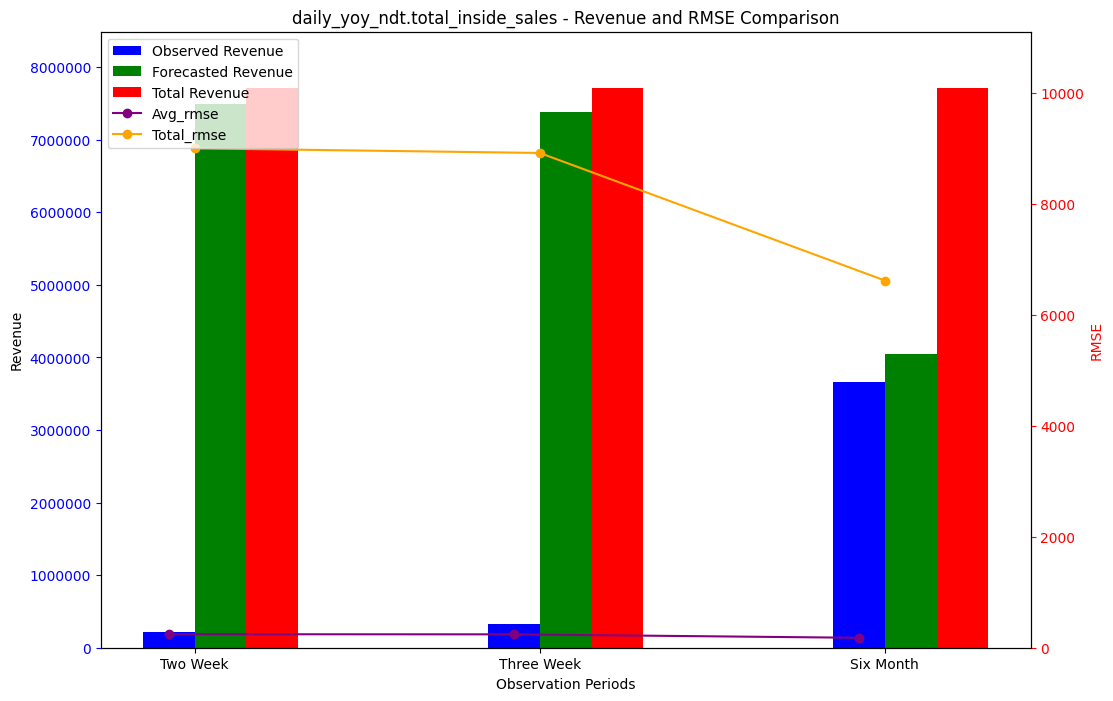

Plotting chart for daily_yoy_ndt.total_food_service


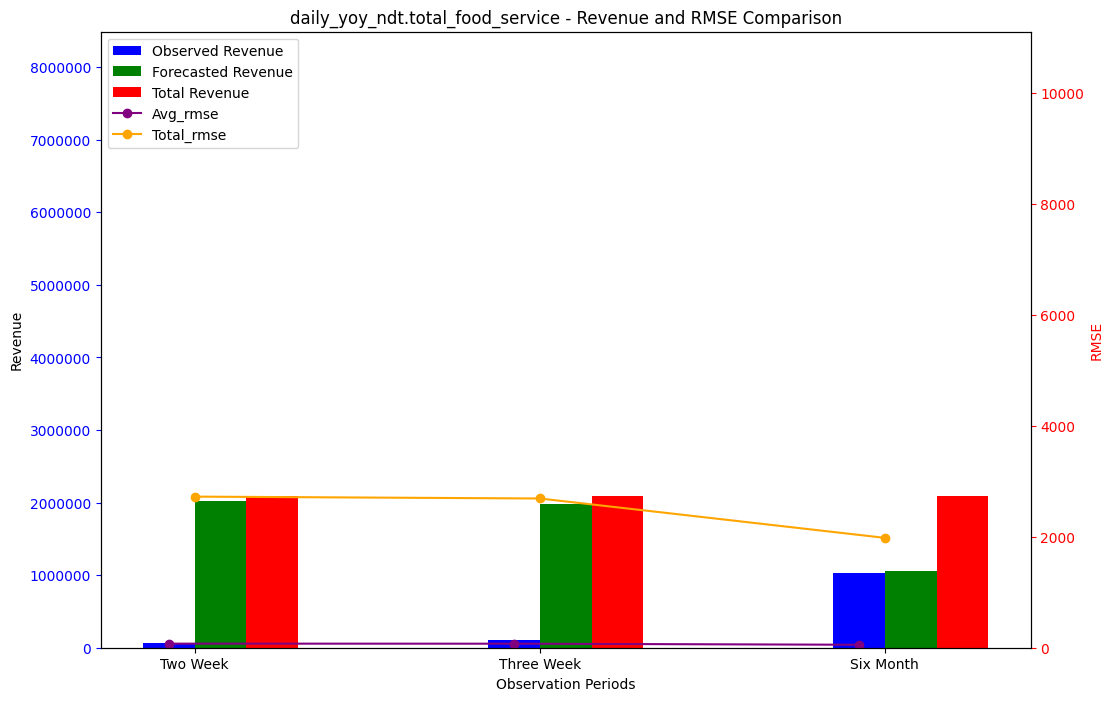

Plotting chart for diesel


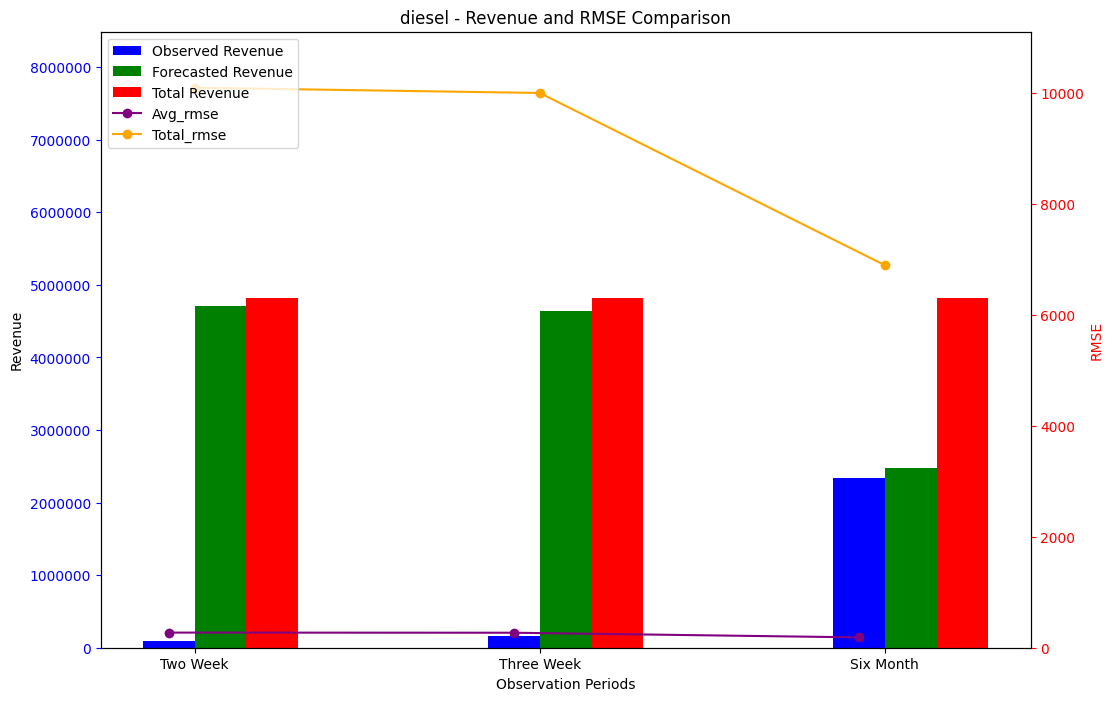

Plotting chart for unleaded


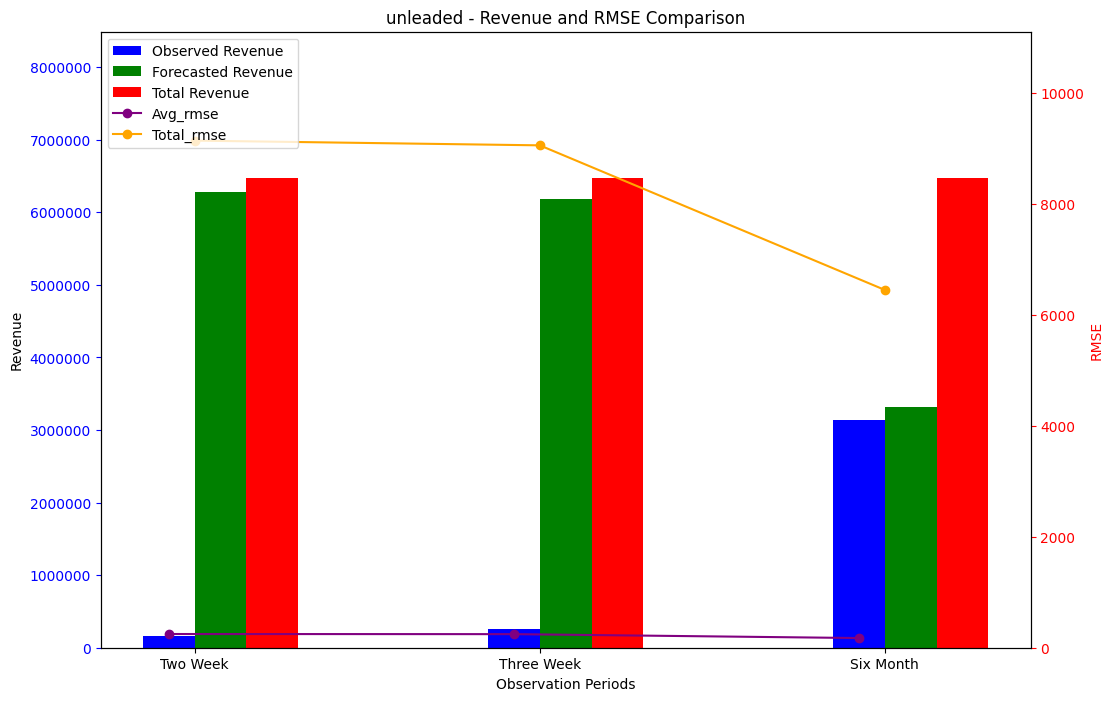

In [27]:
# Finding max values for scales
xgb_max_revenue, xgb_max_rmse = find_max_values([xgb_two_week_results, xgb_three_week_results, xgb_six_month_results])
revenue_limit = xgb_max_revenue * 1.1
rmse_limit = xgb_max_rmse * 1.1

# Plotting charts for each target variable
for target in targets:
    print(f"Plotting chart for {target}")
    plot_revenue_rmse_for_target(target, xgb_two_week_results, xgb_three_week_results, xgb_six_month_results)


In [28]:
from scipy.stats import uniform

# Define the parameter distribution
param_dist_xgb = {
    'estimator__n_estimators': sp_randint(100, 300),
    'estimator__learning_rate': uniform(0.01, 0.1),
    'estimator__max_depth': sp_randint(3, 10),
    'estimator__subsample': uniform(0.7, 0.3),
    'estimator__colsample_bytree': uniform(0.7, 0.3),
    'estimator__gamma': uniform(0, 0.5)
}

# Create RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(multioutput_xgb_regressor, param_distributions=param_dist_xgb,
                                       n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=101)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Best parameters
best_parameters_xgb = random_search_xgb.best_params_
print(f"Best parameters for XGBoost: {best_parameters_xgb}")

# Retrain model with the best parameters
multioutput_xgb_regressor.set_params(**best_parameters_xgb)
multioutput_xgb_regressor.fit(X_train, y_train)


Best parameters for XGBoost: {'estimator__colsample_bytree': 0.9501690587908229, 'estimator__gamma': 0.1534831098361189, 'estimator__learning_rate': 0.09936130796833974, 'estimator__max_depth': 7, 'estimator__n_estimators': 292, 'estimator__subsample': 0.9676191647817811}


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.9501690587908229,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.1534831098361189,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.09936130796833974,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=292, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=101, ...))

In [29]:
# Run evaluations after tuning
tuned_xgb_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_xgb_regressor, 13, targets)
tuned_xgb_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_xgb_regressor, 20, targets)
tuned_xgb_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_xgb_regressor, 182, targets)

# Comparing results with difference for each observation period
print_comparison_with_difference(xgb_two_week_results, tuned_xgb_two_week_results, "Two Week Observation Period")
print_comparison_with_difference(xgb_three_week_results, tuned_xgb_three_week_results, "Three Week Observation Period")
print_comparison_with_difference(xgb_six_month_results, tuned_xgb_six_month_results, "Six Month Observation Period")


--- Two Week Observation Period ---
Before Tuning / After Tuning / Difference
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 210861.72100000005 / 210861.72100000005 / 0.0
  Projected Revenue: 7498042.4375 / 7502096.25 / +4053.8125
  Total Revenue: 7717635.214312988 / 7718231.146563965 / +595.9322509765625
  Average RMSE: 243.22585893387293 / 231.29733049469158 / -11.928528439181349
  Total RMSE: 8999.356780553298 / 8558.001228303589 / -441.35555224970994
daily_yoy_ndt.total_food_service:
  Observed Revenue: 64611.39300000001 / 64611.39300000001 / 0.0
  Projected Revenue: 2019530.8125 / 2024577.9375 / +5047.125
  Total Revenue: 2089128.3426544187 / 2089013.050311279 / -115.29234313964844
  Average RMSE: 73.5908048830259 / 73.1515200033282 / -0.4392848796976949
  Total RMSE: 2722.859780671958 / 2706.6062401231434 / -16.253540548814726
diesel:
  Observed Revenue: 99382.81500000002 / 99382.81500000002 / 0.0
  Projected Revenue: 4710649.4775390625 / 4718598.2470703125 / +7948.7695312

In [30]:
def plot_xgb_feature_importance_with_correlation(model, feature_names, model_name, target_variables, data, top_n=10):
    """
    Plots the top N most important features of the given model with color coding based on correlation.
    Adapted for models wrapped with MultiOutputRegressor.

    :param model: The trained MultiOutputRegressor model.
    :param feature_names: List of feature names.
    :param model_name: Name of the model (for title).
    :param target_variables: List of target variable names.
    :param data: DataFrame containing the features and targets.
    :param top_n: Number of top features to display.
    """
    # Extract feature importances from each estimator and average them
    feature_importances = np.mean([est.feature_importances_ for est in model.estimators_], axis=0)
    features = list(zip(feature_names, feature_importances))

    # Sort features by their importance and select top N features
    sorted_features = sorted(features, key=lambda x: x[1], reverse=True)
    top_features = sorted_features[:top_n]
    top_feature_names = [feature[0] for feature in top_features]

    # Calculating correlation with target variables
    correlations = data[top_feature_names + target_variables].corr()

    # Colors based on correlation
    colors = []
    for feature in top_feature_names:
        avg_corr = correlations.loc[feature, target_variables].mean()
        colors.append('green' if avg_corr >= 0 else 'red')

    # Plotting
    y_pos = np.arange(len(top_feature_names))
    top_importances = [feature[1] for feature in top_features]

    plt.figure(figsize=(10, 6))
    plt.barh(y_pos, top_importances, align='center', alpha=0.7, color=colors)
    plt.yticks(y_pos, top_feature_names)
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Features in {model_name}')
    plt.gca().invert_yaxis()
    plt.show()

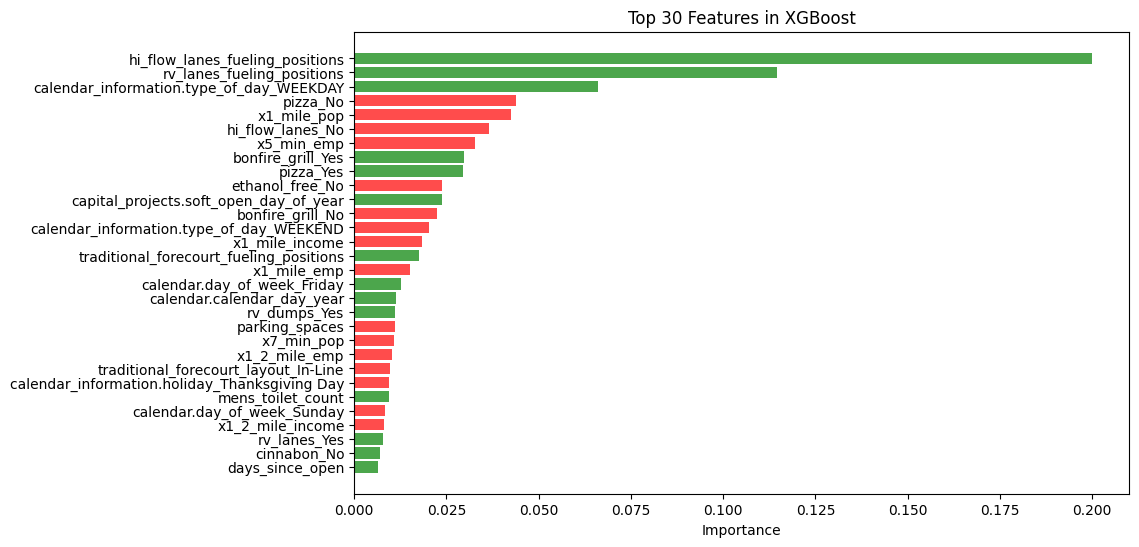

In [31]:
# Plotting feature importance for XGBoost
plot_xgb_feature_importance_with_correlation(
    multioutput_xgb_regressor,
    feature_names,
    'XGBoost',
    targets,
    encoded_df,
    top_n=30
)



In [32]:
from sklearn.svm import SVR

# Initialize SVR
svr = SVR()

# Wrap SVR with MultiOutputRegressor
multioutput_svr_regressor = MultiOutputRegressor(svr)

# Train the model on the training data
multioutput_svr_regressor.fit(X_train, y_train)


MultiOutputRegressor(estimator=SVR())

In [33]:
# Running the evaluations for SVR with different observation periods
svr_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_svr_regressor, 13, targets)
svr_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_svr_regressor, 20, targets)
svr_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_svr_regressor, 182, targets)

# Printing results
print_sales_forecast_details(svr_two_week_results[-1], svr_two_week_results[0], svr_two_week_results[1], "Two Week Observation Period")
print_sales_forecast_details(svr_three_week_results[-1], svr_three_week_results[0], svr_three_week_results[1], "Three Week Observation Period")
print_sales_forecast_details(svr_six_month_results[-1], svr_six_month_results[0], svr_six_month_results[1], "Six Month Observation Period")




--- Two Week Observation Period ---
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 210861.72100000005
  Projected Revenue: 7061786.870323623
  Total Revenue: 7777020.683993038
  Average RMSE: 849.8050204431704
  Total RMSE: 31442.7857563973
daily_yoy_ndt.total_food_service:
  Observed Revenue: 64611.39300000001
  Projected Revenue: 1867648.5610341376
  Total Revenue: 2095367.7376591347
  Average RMSE: 265.4596757926193
  Total RMSE: 9822.008004326915
diesel:
  Observed Revenue: 99382.81500000002
  Projected Revenue: 2723832.9687588513
  Total Revenue: 4825245.84030597
  Average RMSE: 1281.530767016581
  Total RMSE: 47416.6383796135
unleaded:
  Observed Revenue: 163525.12399999998
  Projected Revenue: 5880203.827734856
  Total Revenue: 6532006.561124738
  Average RMSE: 862.8257771860791
  Total RMSE: 31924.55375588493


--- Three Week Observation Period ---
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 329704.613
  Projected Revenue: 6923753.658728801
  Total Revenue: 779

In [34]:
def svr_plot_revenue_rmse_for_target(target, two_week_results, three_week_results, six_month_results, revenue_limit, rmse_limit):
    periods = ['Two Week', 'Three Week', 'Six Month']
    metrics = ['observed', 'forecasted', 'total']
    rmse_metrics = ['avg_rmse', 'total_rmse']
    colors = ['blue', 'green', 'red', 'purple', 'orange']

    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Revenue Bar Chart
    bar_width = 0.15
    index = np.arange(len(periods))

    for i, metric in enumerate(metrics):
        data_to_plot = [two_week_results[-1][target][metric], three_week_results[-1][target][metric], six_month_results[-1][target][metric]]
        ax1.bar(index + i * bar_width, data_to_plot, bar_width, color=colors[i], label=f'{metric.capitalize()} Revenue')

    ax1.set_xlabel('Observation Periods')
    ax1.set_ylabel('Revenue')
    ax1.tick_params('y', colors='blue')
    ax1.set_ylim(0, revenue_limit)  # Consistent y-axis limit for revenue
    ax1.ticklabel_format(style='plain', axis='y')
    ax1.set_xticks(index + bar_width / 2)
    ax1.set_xticklabels(periods)
    ax1.set_title(f'{target} - Revenue and RMSE Comparison')

    # Secondary axis for RMSE
    ax2 = ax1.twinx()
    for i, rmse_metric in enumerate(rmse_metrics):
        rmse_data_to_plot = [two_week_results[0 if rmse_metric == 'avg_rmse' else 1][target], three_week_results[0 if rmse_metric == 'avg_rmse' else 1][target], six_month_results[0 if rmse_metric == 'avg_rmse' else 1][target]]
        ax2.plot(index + i * bar_width / 2, rmse_data_to_plot, color=colors[i + 3], marker='o', label=f'{rmse_metric.capitalize()}')

    ax2.set_ylabel('RMSE', color='red')
    ax2.tick_params('y', colors='red')
    ax2.set_ylim(0, rmse_limit)  # Adjusted y-axis limit for RMSE
    ax2.ticklabel_format(style='plain', axis='y')

    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

# Finding max values for scales for SVR model
svr_max_revenue, svr_max_rmse = find_max_values([svr_two_week_results, svr_three_week_results, svr_six_month_results])

# Adding a buffer to the max values for scale consistency
svr_revenue_limit = svr_max_revenue * 1.1  # 10% extra buffer
svr_rmse_limit = svr_max_rmse * 1.1  # 10% extra buffer

Plotting chart for daily_yoy_ndt.total_inside_sales


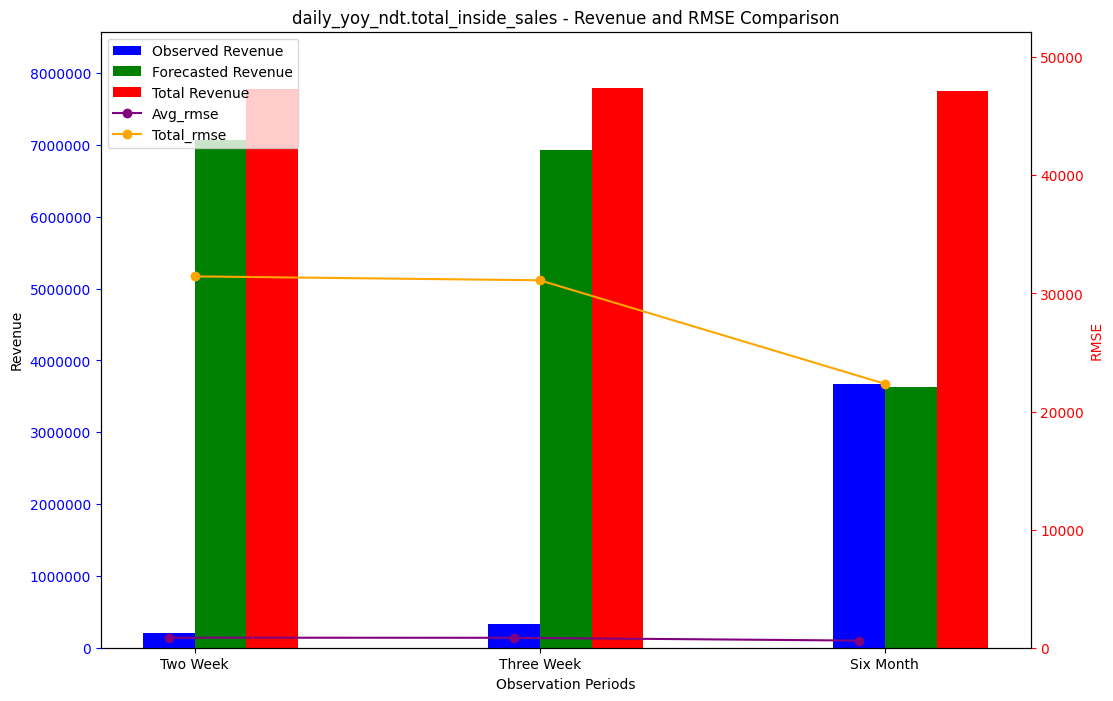

Plotting chart for daily_yoy_ndt.total_food_service


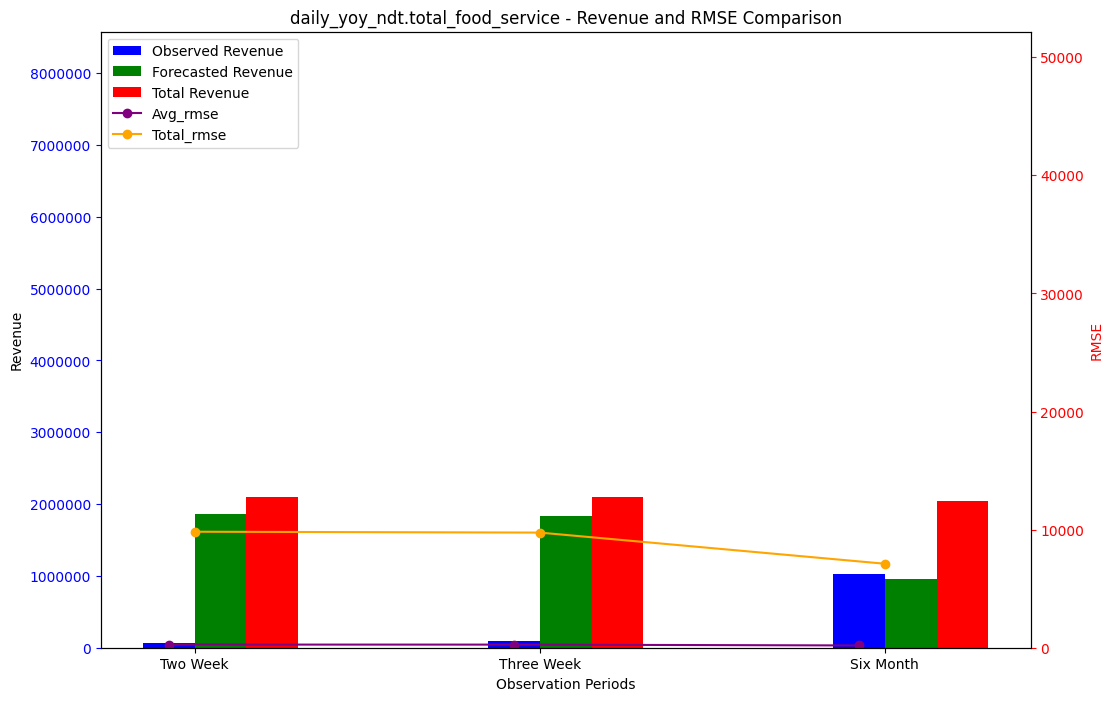

Plotting chart for diesel


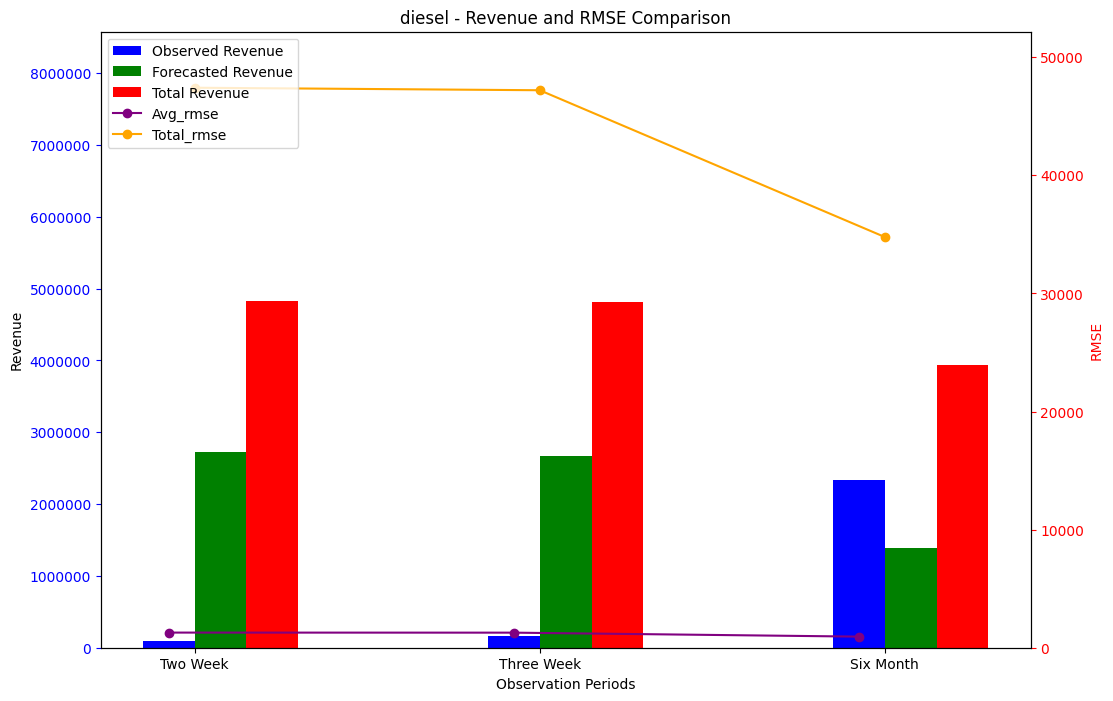

Plotting chart for unleaded


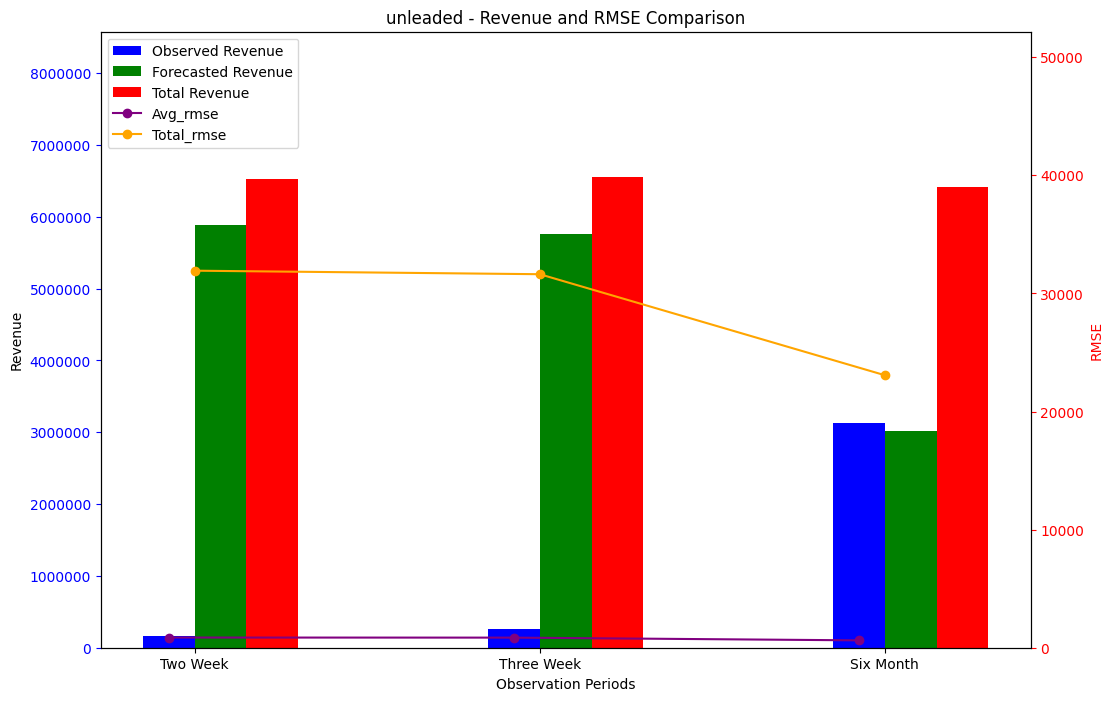

In [35]:

# Plotting charts for each target variable
for target in targets:
    print(f"Plotting chart for {target}")
    svr_plot_revenue_rmse_for_target(target, svr_two_week_results, svr_three_week_results, svr_six_month_results, svr_revenue_limit, svr_rmse_limit)

In [ ]:
# Define the parameter distribution
param_dist_svr = {
    'estimator__C': uniform(0.1, 10),
    'estimator__gamma': ['scale', 'auto'],
    'estimator__epsilon': uniform(0.1, 1)
}

# Create RandomizedSearchCV
random_search_svr = RandomizedSearchCV(multioutput_svr_regressor, param_distributions=param_dist_svr,
                                       n_iter=3, cv=3, scoring='neg_mean_squared_error', random_state=101)

# Fit the model
random_search_svr.fit(X_train, y_train)

# Best parameters
best_parameters_svr = random_search_svr.best_params_
print(f"Best parameters for SVR: {best_parameters_svr}")

# Retrain model with the best parameters
multioutput_svr_regressor.set_params(**best_parameters_svr)
multioutput_svr_regressor.fit(X_train, y_train)

In [ ]:
# Run evaluations after tuning for SVR
tuned_svr_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_svr_regressor, 13, targets)
tuned_svr_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_svr_regressor, 20, targets)
tuned_svr_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_svr_regressor, 182, targets)

# Printing comparison results with differences for each observation period
print_comparison_with_difference(svr_two_week_results, tuned_svr_two_week_results, "Two Week Observation Period")
print_comparison_with_difference(svr_three_week_results, tuned_svr_three_week_results, "Three Week Observation Period")
print_comparison_with_difference(svr_six_month_results, tuned_svr_six_month_results, "Six Month Observation Period")



In [ ]:
def calculate_feature_averages(X_train):
    feature_averages = {}
    for col in X_train.columns:
        # For one-hot encoded features (binary values), use mode
        if X_train[col].nunique() == 2 and set(X_train[col].unique()) == {0, 1}:
            feature_averages[col] = X_train[col].mode()[0]
        else:
            # For numerical features, use mean
            feature_averages[col] = X_train[col].mean()
    return feature_averages

# Calculate averages
averages = calculate_feature_averages(X_train)

# Outputting the averages
for feature, average in averages.items():
    print(f"{feature}: {average}")



In [ ]:
# re-read in data from CSV files
df3 = pd.read_csv(file1_path)
df4 = pd.read_csv(file2_path)

In [ ]:
# 1. Drop columns with only 1 unique value in df4
cols_to_drop = [col for col in df4.columns if df4[col].nunique() == 1]
df4.drop(cols_to_drop, axis=1, inplace=True)

# 2. Remove duplicate columns in df4
df4.drop(['hi_flow_lanes_fueling_positions_2', 'rv_lanes_fueling_positions_2'], axis=1, inplace=True)

# 3. Replace 'N/A' with 'Not Applicable' in df4
df4.replace('N/A', 'Not Applicable', inplace=True)

# 4. Extract year and day of the year from date columns in df3
df3['capital_projects.soft_open_year'] = pd.to_datetime(df3['capital_projects.soft_opening_date']).dt.year
df3['capital_projects.soft_open_day_of_year'] = pd.to_datetime(df3['capital_projects.soft_opening_date']).dt.dayofyear

df3['calendar.calendar_day_year'] = pd.to_datetime(df3['calendar.calendar_day_date']).dt.year
df3['calendar.calendar_day_day_of_year'] = pd.to_datetime(df3['calendar.calendar_day_date']).dt.dayofyear

# 5. Add 'days_since_open' column to df3
df3['days_since_open'] = (pd.to_datetime(df3['calendar.calendar_day_date']) - pd.to_datetime(df3['capital_projects.soft_opening_date'])).dt.days

# 6. Drop the original date columns if they are no longer needed
df3.drop(['capital_projects.soft_opening_date', 'calendar.calendar_day_date'], axis=1, inplace=True)

# 7. Remove 'Unnamed: 0' column from df3
df3.drop('Unnamed: 0', axis=1, inplace=True)

# 8. Remove 'Unnamed: 0' column from df4
df4.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
# Display the entire df4 dataframe
pd.set_option('display.max_rows', None)  # Ensure all rows are shown
display(df4)

# Print the data types of each column
print("\nData Types of Each Column:")
print(df4.dtypes)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode object-type columns
encoder = OneHotEncoder(sparse=False, drop='first')
df4_encoded = pd.DataFrame(encoder.fit_transform(df4.select_dtypes('object')))
df4_encoded.columns = encoder.get_feature_names_out(df4.select_dtypes('object').columns)
df4_encoded.index = df4.index

# Concatenate the encoded dataframe with the original dataframe
df4 = pd.concat([df4.drop(df4.select_dtypes('object').columns, axis=1), df4_encoded], axis=1)

# Impute the mean for integer variables (except specified columns)
mean_values = df4.drop(['site_id_msba', 'open_year', 'years_since_last_project'], axis=1).mean()
df4.fillna(mean_values, inplace=True)

# Create a new row with imputed values, 2023 for open_year, 0 for years_since_last_project, and 101 for site_id_msba
new_row = df4.mean()
new_row['site_id_msba'] = 101
new_row['open_year'] = 2023
new_row['years_since_last_project'] = 0

# Append the new row to the dataframe
df4 = df4.append(new_row, ignore_index=True)

# Display the last few rows to confirm the new row addition
df4.tail()


In [ ]:
# Display the entire df4 dataframe
pd.set_option('display.max_rows', 400)  # Ensure all rows are shown
display(df3)

# Print the data types of each column
print("\nData Types of Each Column:")
print(df3.dtypes)

In [ ]:
from collections import Counter
import calendar

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Analyzing existing data to find common holiday dates
holiday_data = df3[df3['calendar_information.holiday'] != 'NONE']
holidays = holiday_data.groupby(['calendar_information.holiday', 'calendar.calendar_day_day_of_year']).size().reset_index(name='counts')
holidays = holidays.sort_values('counts', ascending=False).drop_duplicates('calendar_information.holiday')

# Extract the most common day of the year for each holiday
holiday_dates = {row['calendar_information.holiday']: row['calendar.calendar_day_day_of_year'] for index, row in holidays.iterrows()}

# Function to determine if a given day is a holiday
def is_holiday(day_of_year):
    for holiday, day in holiday_dates.items():
        if day_of_year == day:
            return holiday
    return 'NONE'

# Function to get the next day of the week
def next_day(current_day):
    days = list(calendar.day_name)
    next_index = (days.index(current_day) + 1) % 7
    return days[next_index]

# Initialize the first row for site_id_msba = 101
first_row = {
    'calendar.fiscal_week_id_for_year': 1,
    'calendar.day_of_week': 'Sunday',
    'calendar_information.holiday': is_holiday(1),
    'calendar_information.type_of_day': 'WEEKEND',
    'daily_yoy_ndt.total_inside_sales': 0.0,
    'daily_yoy_ndt.total_food_service': 0.0,
    'diesel': 0.0,
    'unleaded': 0.0,
    'site_id_msba': 101,
    'capital_projects.soft_open_year': 2023,
    'capital_projects.soft_open_day_of_year': 1,
    'calendar.calendar_day_year': 2023,
    'calendar.calendar_day_day_of_year': 1,
    'days_since_open': 0
}

# DataFrame to hold new site data
new_site_data = pd.DataFrame([first_row])

# Generate the remaining 364 rows
current_day_of_week = first_row['calendar.day_of_week']
for day in range(1, 365):
    current_day_of_week = next_day(current_day_of_week)
    day_of_year = day + 1
    new_row = {
        'calendar.fiscal_week_id_for_year': (day_of_year - 1) // 7 + 1,
        'calendar.day_of_week': current_day_of_week,
        'calendar_information.holiday': is_holiday(day_of_year),
        'calendar_information.type_of_day': 'WEEKEND' if current_day_of_week in ['Saturday', 'Sunday'] else 'WEEKDAY',
        'daily_yoy_ndt.total_inside_sales': 0.0,
        'daily_yoy_ndt.total_food_service': 0.0,
        'diesel': 0.0,
        'unleaded': 0.0,
        'site_id_msba': 101,
        'capital_projects.soft_open_year': 2023,
        'capital_projects.soft_open_day_of_year': 1,
        'calendar.calendar_day_year': 2023,
        'calendar.calendar_day_day_of_year': day_of_year,
        'days_since_open': day
    }
    new_site_data = new_site_data.append(new_row, ignore_index=True)

# Insert the new rows into df3
df3 = df3.append(new_site_data, ignore_index=True)

# Display the last few rows to confirm the addition
df3.tail()

In [ ]:
# One-hot encoding all object type columns in df3
df3_encoded = pd.get_dummies(df3, columns=df3.select_dtypes(include=['object']).columns, drop_first=True)

# Displaying the first few rows to verify the changes
df3_encoded.head()


In [ ]:
# Merging df3 and df4 on 'site_id_msba'
merged_df = pd.merge(df3_encoded, df4, on='site_id_msba', how='left')

# Displaying the first few rows of the merged dataframe to confirm the merge
merged_df.head()


In [ ]:
# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Defining the target variables
target_vars = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']

# Splitting the data into features and targets
X = merged_df.drop(target_vars, axis=1)
y = merged_df[target_vars]

# Creating training set (site_id_msba != 101)
X_train = X[X['site_id_msba'] != 101]
y_train = y[X['site_id_msba'] != 101]

# Creating forecasting set (site_id_msba == 101)
X_forecast = X[X['site_id_msba'] == 101]
y_forecast = y[X['site_id_msba'] == 101]  # Initially empty or zero-filled, to be predicted

# Dropping 'site_id_msba' from X_train and X_forecast as it's not a feature for modeling
X_train.drop('site_id_msba', axis=1, inplace=True)
X_forecast.drop('site_id_msba', axis=1, inplace=True)


In [ ]:
# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

# Initialize the XGBRegressor
xgb_regressor = XGBRegressor()

# Wrap XGBRegressor with MultiOutputRegressor
multioutput_xgb_regressor = MultiOutputRegressor(xgb_regressor)

# Train the model on the training data
multioutput_xgb_regressor.fit(X_train, y_train)

# Making predictions on the forecasting set
y_forecast_predicted = multioutput_xgb_regressor.predict(X_forecast)

# Replace the zeros in y_forecast with the predictions
y_forecast.loc[:, :] = y_forecast_predicted

# Calculating total first year revenue
total_first_year_revenue = y_forecast.sum(axis=1).sum()

def forecast_total_revenue(X_forecast, model):
    # Forecasting using the model
    y_forecast_predicted = model.predict(X_forecast)

    # Summing up all the predicted values to get the total revenue
    total_revenue = np.sum(y_forecast_predicted)

    # Updating y_forecast with predicted values (to keep the change within this function)
    y_forecast.loc[:, :] = y_forecast_predicted

    return total_revenue

# Call the function and display the result
total_revenue_forecast = forecast_total_revenue(X_forecast, multioutput_xgb_regressor)
print(f"Total first year revenue forecast: {total_revenue_forecast}")


In [ ]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

# Initialize the XGBRegressor
xgb_regressor = XGBRegressor()

# Wrap XGBRegressor with MultiOutputRegressor
multioutput_xgb_regressor = MultiOutputRegressor(xgb_regressor)

# Set the best parameters from the first model run
multioutput_xgb_regressor.set_params(**best_parameters_xgb)

# Train the model on the training data
multioutput_xgb_regressor.fit(X_train, y_train)

# Making predictions on the forecasting set
y_forecast_predicted = multioutput_xgb_regressor.predict(X_forecast)

# Replace the zeros in y_forecast with the predictions
y_forecast.loc[:, :] = y_forecast_predicted

# Calculating total first year revenue
total_first_year_revenue = y_forecast.sum(axis=1).sum()

def forecast_total_revenue(X_forecast, model):
    # Forecasting using the model
    y_forecast_predicted = model.predict(X_forecast)

    # Summing up all the predicted values to get the total revenue
    total_revenue = np.sum(y_forecast_predicted)

    # Updating y_forecast with predicted values (to keep the change within this function)
    y_forecast.loc[:, :] = y_forecast_predicted

    return total_revenue

# Call the function and display the result
total_revenue_forecast = forecast_total_revenue(X_forecast, multioutput_xgb_regressor)
print(f"Total first year revenue forecast: {total_revenue_forecast}")
